# Introduction

![title](https://www.pittsburghmagazine.com/content/uploads/data-import/1d64829b/dicello51.jpg)

Having access to a car is a valuable necesity that most American's rely on for their daily functions. Whether it be getting to work, going to the grocery store, or heading out for an event, being able to arrive at a location without the need for public transportation or ride-sharing is incredibly valuable. In 2015, it was recorded that over 75% of households within all of pittsburgh's neighborhoods had at least one car, translating to roughly 100,000 car owners across all of pittsburgh ([Source](https://www.governing.com/archive/car-ownership-numbers-of-vehicles-by-city-map.html)). Considering that At least one third of Pittsburgh residents drive or own a car, This of course means that there will be a fair amount of car accidents every year.

Car accidents are a fact of life, and almost every car owner will at least go through one accident in their driving career. Whether it be through distracted driving, obstructions in the road, or other factors that are out of a driver's control, car accidents are an unpleasant experience for everyone involved. Despite how freakish they may be, they can almost always be prevented, and there are several measures that cities have taken to decrease the rate of car accidents. Preventive measures such as safer roads, lower speed limits, and speed humps are just some of the ways in which cities such as Pittsburgh can decrease the likelyhood that someone can get into a car accident.

Since transportation is a crucial part of everyday life, **our group believed that the best neighborhood in Pittsburgh is the neighborhood where it is safest to drive in.** There are plenty of factors which contribute to road safety that are both caused by the drivers and by city officials. We decided to look at both of these causes and see how the most important ones contribute to how safe each neighborhood is to drive in. **We believed that neighboorhoods with less overall drivers and more speeding-preventive measures would be the safest to drive in.**

## Importing Pandas and Geopandas

In [1]:
import pandas as pd
%matplotlib inline
import geopandas

In order to gather the necessary data, we first need to import both the Pandas and Geopandas libraries. The Pandas library will allow us to sort and graph our data based on the standards we set. Geopandas will allow us to transpose our data onto a map, which can serve as a complementary viusal to any other data representations.

# Part 1: Average Daily Traffic Amounts in Pittsburgh Neighborhoods

![title](https://media.wired.com/photos/593256b42a990b06268a9e21/191:100/w_1280,c_limit/traffic-jam-getty.jpg)

Traffic is the part of driving which absoultely nobody looks forward too. Not only can it take an incredibly long time, but it can lead to people being late for work, or any other event that they need to attend. It also takes up a good chunk of the day, and no one wants to spend an hour of their day standing behind honking cars. For many people, the amount of traffic a neighborhood experiences can be a deciding factor in whether they want to buy a house in that area. They may prefer a neighborhood with less traffic as it will make the daily commute to work much more pleasant and safer.

Being in a neighborhood with less traffic means that there are most likely less car owners in that neighborhood, in turn creating a neighborhood that is safter to drive and less congested. Although traffic isn't the leading cause of car accidents (that would be distracted driving), there are several reasons as to why high amounts of traffic can lead to car accidents. Drivers stuck in traffic are more likely to get irritated and angry, leading to more agressive driving and a higher chance of a collision. Secondly, having a high volume of cars within a tightly packed area can lead to smaller accidents such as rear ends.

The combination of getting to locations quickly and safely are all based on the volume of traffic within an area, meaning that areas with lower average daily traffic are more likely to be safer to drive in than areas with high amouts of traffic.



## Obtaining Traffic Data

For this metric, we obtained our data from the Wester Pennsylvania Regional Data Center's database on Pittsburgh's traffic count. First, we imported the dataset into the notebook, and then had every point of data in the set listed by the neighborhood it was located in. Down below is a chart of the five neighborhoods at the top of the database

In [2]:
traffic = pd.read_csv("pitt-traffic-count.csv", index_col="neighborhood")
traffic = traffic.dropna(how='all')
traffic.head()   

,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,...,speed95_percent,longitude,latitude,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
neighborhood,,,,,,,,,,,,,,,,,,,,,
Polish Hill,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,25.0,...,37.0,-79.967772,40.455733,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
Central Lawrenceville,1026101993,140,1.121444e+09,2019-01-24,NaN,NaN,NaN,NaN,Intersection Study,NaN,...,NaN,-79.952249,40.466157,7.0,9.0,42003090200,2.0,9.0,2.0,3-6
Windgap,1032382575,11,1.539893e+09,2018-08-28,2018-09-04,NaN,NaN,NaN,NaN,35.0,...,41.0,-80.076469,40.460717,2.0,28.0,42003563000,5.0,28.0,6.0,1-16
Squirrel Hill South,103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,25.0,...,33.0,-79.914335,40.437379,5.0,14.0,42003140800,3.0,14.0,4.0,2-18
Perry North,1039546167,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-80.019211,40.490794,1.0,26.0,42003260200,1.0,26.0,1.0,1-15


The column which we are most interested in is the average daily car traffic column, so were going to extract the data from there and plot the areas with the lowest amoutns of traffic onto a bar graph.

There are some neighborhoods where traffic was recorded on multiple dates. If we were to accumulate all of the recorded data for one neighborhood, then it would produce and innacurate and large number, so we are going to only include the data that was most recently recorded

In [3]:
traffic = traffic[~traffic.index.duplicated(keep='last')]

Next, were going to plot our bar chart. We will first get the average daily car traffic amounts from each neighborhood, remove any neighborhoods where traffic was never recorded, and then we will plot the top twenty neighborhoods with the least amount of average daily car traffic

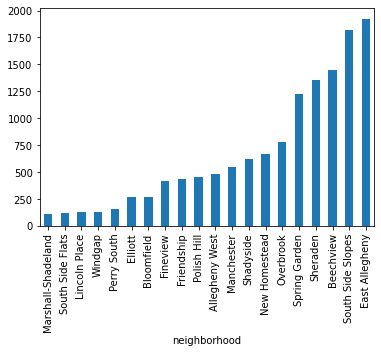

In [4]:
daily_traffic = traffic.groupby("neighborhood").sum()['average_daily_car_traffic']
daily_traffic = traffic["average_daily_car_traffic"].dropna(how='any').sort_values(ascending=True)[:20]
daily_traffic.plot(kind='bar')

Alternatively, we can plot the chart in descending order to see the neighborhoods with the most amount of traffic.

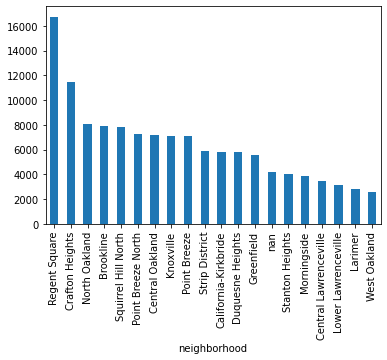

In [5]:
daily_traffic = traffic["average_daily_car_traffic"].dropna(how='any').sort_values(ascending=False)[:20]
daily_traffic.plot(kind='bar')

So as we can see from the bar charts, the neighborhood with the least amount of average daily traffic is **Marshall-Shadeland**, while **Regent Square** contains the highest amount of daily traffic

Another way we can visualize this data is through a map that uses a color scale to either indicate a high or low amount of average daily traffic. We can use geopandas in order to import the actual map, and then we are able to translate our data from the bar graph onto the map below. This visualization allows us to see traffic amounts within every neighborhood, where as the bar chart only gave us the top twenty neighborhoods. We were able to change the color scale, size, and legend of the map as well.

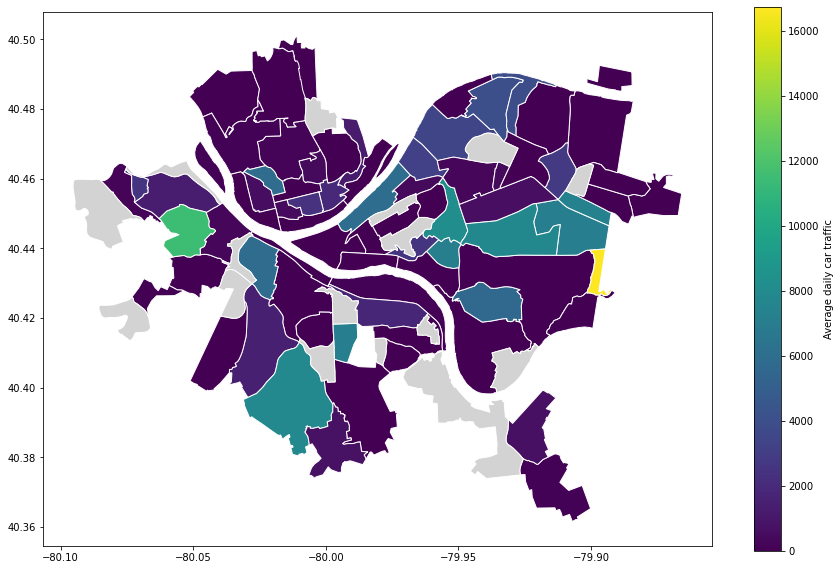

In [6]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
num_traf = traffic.groupby("neighborhood").sum()['average_daily_car_traffic']

traf_map = neighborhoods.merge(num_traf, how='left', left_on='hood', right_on='neighborhood')

traf_map.plot(column="average_daily_car_traffic", 
            cmap='viridis',
            edgecolor="white",
            legend=True,
            legend_kwds={'label': "Average daily car traffic"},
            figsize=(15,10),
            missing_kwds={"color": "lightgrey"})

The areas that have a green or yellow color have higher amounts of daily car traffic, wheras areas with a dark blue or purple color have a lower amount of average daily car traffic. Areas In which data was not recorder are colored light grey. Although we can easily point out where regent square is, it is near impossible to point out where Marshall-Shadeland is withouth already knowing where it is located on the map.

Through this map, we can see that the majority of neighborhoods have a relatively similar amount of traffic, with only a few neighborhoods sticking out with very high amounts. This does not suggest that the neighborhoods on the low end have little to no traffic, but that they have an average/decent amount of traffic, and are more safer and easier to drive an than the neighborhoods which are marked with a lighter color.**

# Part 2: Speed Bumps in Pittsburgh Neighborhoods

![speed_bump](https://jiffylubesuncoast.com/wp-content/uploads/2019/09/Speed-Bump-1024x581.jpg)

Speed bumps are pretty boring and not the most fun thing to encounter while driving, but they do serve a purpose, and that purpose is very important. They are usually in pedestrian-dense areas, and make sure drivers are going a slow and safe speed so as to not put any pedestrians (or even ther driver) in danger. Based on our overall metric of safest neighborhood to drive in, we are saying that more speed bumbs in a neighborhood is a good thing. We made this correlation because the more speed bumbs, then the more cars that are driving safe and slow.

## Data

First we have to use pandas to read our dataset.

In [16]:
speed_humps_data = pd.read_csv("Speed-Humps.csv")

Now that we have all of our tools in our bag, let's look at the first five columns of our data to see what we're working with...

In [17]:
speed_humps_data.head()

,id,hump_id,locator_address_number,locator_street,pavement,speed_hump_material,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,430808404,1,4337.0,Saline St,9257,Asphalt,Squirrel Hill South,5,14,42003141400,3,14,4,2-15,40.419835,-79.926062
1,1520886592,2,NaN,Summerset Dr,15346,NaN,Squirrel Hill South,5,14,42003141400,3,14,4,2-20,40.425040,-79.912040
2,858537521,3,511.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.456746,-79.954521
3,297775878,4,547.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.457333,-79.954899
4,1061197751,5,593.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.458061,-79.955355


With this dataset, there's not a column that says "speed hump count" or anything, so it doesn't really tell us about the total amount of speed humps each neighborhood has (which is what we really want). So I'll filter for the "neighborhood" column, and see how many entries each neighborhood has by using the \'value_counts\' function.

In [9]:
speed_humps_data['neighborhood'].value_counts()

Squirrel Hill South    18
Carrick                 9
North Oakland           6
Polish Hill             6
Homewood South          4
Perry North             4
Brookline               4
South Side Slopes       4
Upper Hill              4
Mount Washington        3
Squirrel Hill North     3
South Side Flats        3
Garfield                3
Bloomfield              3
Highland Park           2
Overbrook               1
Central Oakland         1
Stanton Heights         1
Name: neighborhood, dtype: int64

## *Graphic* Visuals

Now that I have the nice and filtered data, I want to see it visually. 

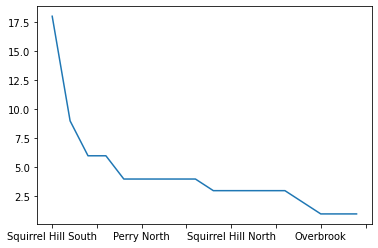

In [10]:
speed_humps_data['neighborhood'].value_counts().plot()

This is an ok way of looking at it, but still not great...
I'll try the ".bar" function:

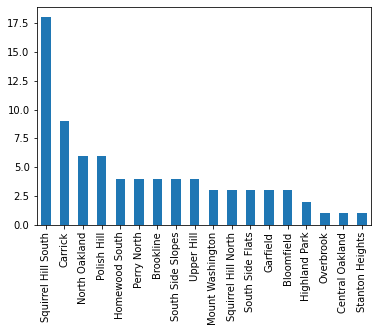

In [11]:
speed_humps_data['neighborhood'].value_counts().plot.bar()

Perfect.

## GeoMap

First I'll import the neighborhoods map.

In [12]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

Now I have to make a new dataframe so I can merge it with the neighborhoods map.

In [13]:
hump_hoods = speed_humps_data['neighborhood'].value_counts().reset_index().rename({'index' : 'neighborhood', 'neighborhood' : 'count'}, axis=1)
hump_hoods

,neighborhood,count
0,Squirrel Hill South,18
1,Carrick,9
2,North Oakland,6
3,Polish Hill,6
4,Homewood South,4
5,Perry North,4
6,Brookline,4
7,South Side Slopes,4
8,Upper Hill,4
9,Mount Washington,3


Now I merge...

In [14]:
speed_humps_map = neighborhoods.merge(hump_hoods, how='left', left_on = 'hood', right_on = 'neighborhood')

Now I plot and visulaize:

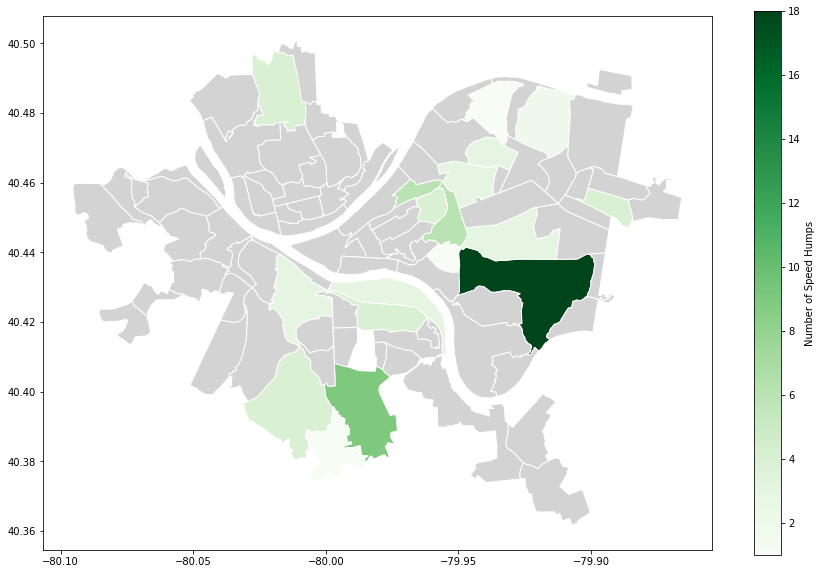

In [15]:
speed_humps_map.plot(column = 'count', 
               cmap = 'Greens',              
               edgecolor = "white",       
               legend = True,             
               legend_kwds = {'label': "Number of Speed Humps"},
               figsize = (15, 10),        
               missing_kwds = {"color": "lightgrey"})

## Conclusion

Through the use of pandas, I was able to extrapulate some useful data and display it visually. So if you're a fan of speed humps, Squirrel Hill South is the neighborhood you want to live in. And if you don't like them, maybe live in Central Oakland or any of the neighborhoods without any. But as for our overall metric of safest neighborhood to drive in, purely looking at the total amount speed bumps each one has, it would be Squirrel Hill South, which has double the amount of second place. I did not weigh any of these variables or factors based on size or population because I just wanted to look at the pure amount of speed bumps, no matter the area or amount of people each neighborhood has.

## Part 3: Analyzing Median Age of Death in Allegheny County Neighborhoods

Now we are going to analyze the median age of death in these neighborhoods. Obviously people are going to want to live in a neighborhood where people die at a later age, and traffic counts have a great deal to do with whether or not someone dies at a younger age. Let's read the death data and view a small piece of it.

In [2]:
data = pd.read_csv("ages.csv", index_col = "NEIGHBORHOOD")
data.dropna(how='all').head(15)

,BLACKdeaths,Black MD AGE AT DEATH,WHITEdeaths,White MD AGE AT DEATH,TOT.deaths,MD AGE
NEIGHBORHOOD,,,,,,
North Shore,0.0,0.0,4.0,NaN,5.0,80.0
Allegheny West,3.0,NaN,4.0,NaN,8.0,65.0
Saint Clair,5.0,67.5,5.0,67.5,10.0,67.5
West End,5.0,76.7,9.0,78.0,14.0,77.5
Esplen,3.0,NaN,13.0,72.5,16.0,71.7
Arlington Heights,10.0,55.0,7.0,72.5,17.0,63.7
Strip District,7.0,76.7,12.0,70.0,19.0,72.5
Fairywood,11.0,62.5,9.0,42.5,21.0,53.3
Hays,1.0,NaN,23.0,78.9,24.0,78.3


These are the first 15 entries in the CSV file. As you can see, it includes some other data, including total deaths and stats based on race. Now let's graph some of it, using a scatterplot with total deaths and the medians.

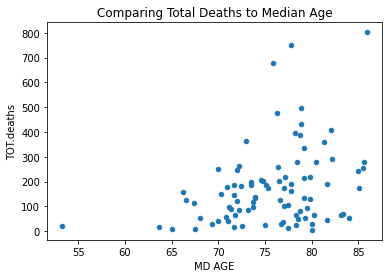

In [3]:
data.plot(kind='scatter', x = 'MD AGE', y = 'TOT.deaths', title = 'Comparing Total Deaths to Median Age')

As you can see, there is a large cluster at the bottom. It's a good start, but it doesn't really give us any kind of clearance or answer. Here's a **colorful map** that shows how the weight of the data for each Neighborhood.

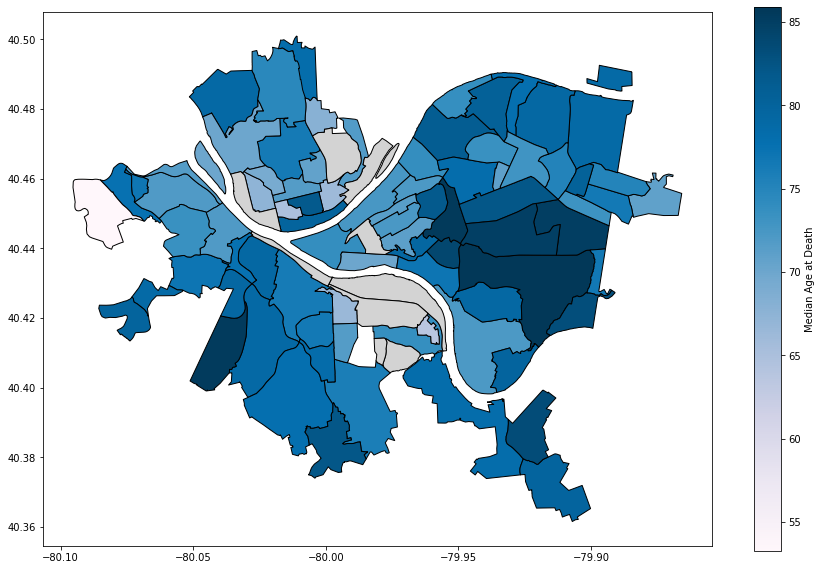

In [4]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
age_data = data.groupby("NEIGHBORHOOD").sum()['MD AGE']
data_map = neighborhoods.merge(age_data, how='left', left_on='hood', right_on='NEIGHBORHOOD')
data_map.plot(column = 'MD AGE', 
             cmap = 'PuBu',
             edgecolor = 'black',
             legend = True,
             legend_kwds = {'label' : 'Median Age at Death'},
             figsize = (15, 10),
             missing_kwds = {'color' : 'lightgray'})

***Now we're getting somewhere.*** Let's put a name to these neighborhoods that have the highest MD Age of Death by ranking them. Since we are trying to figure out which neighborhood is "best", higher numbers will equate to a better neighborhood.

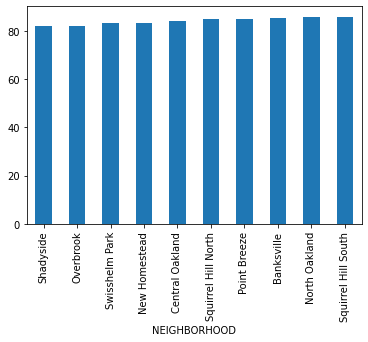

In [5]:
data["MD AGE"].sort_values(ascending = True)[78:88].plot.bar()

These are the top ten neighborhoods with the highest median death age. As we can see, Squirrel Hill South is on top with nearly an 86 median age of death. Squirrel Hill South also has the most deaths of any neighborhood, which actually helps its case because of how high the median remains with the most casualties to consider. So far, Squirrel Hill South looks to be in the lead for the best neighborhood. Combining this with the other two data analysis will give us a better idea of how to answer the *burning question* of which neighborhood is the best. According to [this website](https://injuryfacts.nsc.org/motor-vehicle/historical-fatality-trends/deaths-by-age-group), most people dying in car accidents are between 25-44, so having a higher median death will mean that this neighborhood has less accidents, meaning more safe drivers live there, which definitely tells how "good" that neighborhood is.

# Conclusion

My personal favorite neighborhood in Pittsburgh is West Mifflin (it's not on the map but it's right at the southern border), because of that is where many of my family members live and I have been there often. However, based on the findings from this project, it's relatively obvious that Squirrel Hill South is the best neighborhood to live in for avoiding car crashes, which is a good distinction to have when considering that most people in the Pittsburgh area have no idea what they are doing.